In [1]:
from manim import *
from manim_voiceover import VoiceoverScene
from manim_voiceover.services.gtts import GTTSService

Manim Community v0.17.3

/Users/mnica/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [171]:
##### HELPER FUNCTIONS

COLOR_LIST = [GREY_D,BLUE,RED,PURPLE,GREEN] #GREEN,YELLOW,PURPLE,TEAL]

def LabeledTriangle(label='',my_scale=1,**triangle_args):
    tri = Triangle(**triangle_args).scale(my_scale)
    text = MathTex(label)
    text.set_x(tri.get_x())
    if len(label)==1:
        text.height = tri.height/2
        text.align_to(tri,DOWN)
        text.shift(my_scale*0.21*UP)
    if len(label)==2:
        text.height = tri.height/2.5
        text.align_to(tri,DOWN)
        text.shift(my_scale*0.15*UP)
        
    tri.set_z_index(-1)
    tri.set_fill(COLOR_LIST[0],opacity=1.0) #set it to the "0" color by default
    if label == '':
        return VGroup(tri)
    else:
        return VGroup(tri,text)
    
def generate_pascals_triangle(num_rows,mod_k=None):
    #generates num_rows of pascals triangle as a numpy array.
    # if mod_k is not None, will return mod k of each row
    pascal_t = np.zeros((num_rows, num_rows), dtype=int)
    pascal_t[0,0] = 1
    for i in range(num_rows-1):
        if mod_k:
            pascal_t[i+1,:] =np.mod( pascal_t[i,:] + np.roll(pascal_t[i,:],1) , mod_k)
        else:
            pascal_t[i+1,:] = pascal_t[i,:] + np.roll(pascal_t[i,:],1)
    return pascal_t


TRI = [LabeledTriangle(str(i),color=WHITE,stroke_width=0).scale(0.8) for i in range(25)]

EMPTY_TRI = VGroup(Triangle(color=WHITE,stroke_width=0).scale(0.8))
DELAY = 0.1




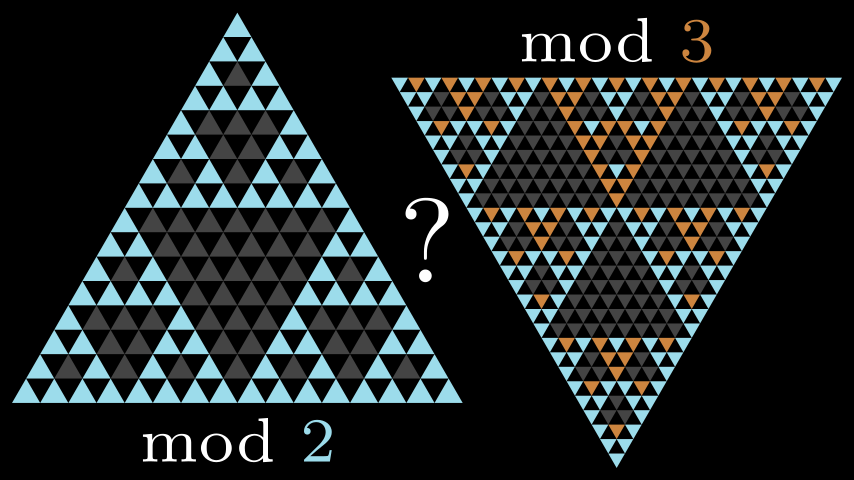

In [210]:
%%manim -ql -v CRITICAL thumb
#THUMB_COLOR_LIST = [GREY_D,BLUE_B,RED_B,PURPLE_B,GREEN_B]
THUMB_COLOR_LIST = [GREY_D,BLUE_B,LIGHT_BROWN,PURPLE_B,GREEN_B]


class thumb(Scene):
    def construct(self):
        labels = True
        ####CREAT THE GLOBAL VARIABLE P FOR PASCALS TRIANGLE MOBJECTS
        
        p_vals = [2,3,5]
        my_color_list = [THUMB_COLOR_LIST[1],THUMB_COLOR_LIST[2],THUMB_COLOR_LIST[3]]
        my_n_rows = [2**4,3**3,5**2] #the places to zoom out to in the opening scene

        n_rows = max(my_n_rows) 

        P_val = generate_pascals_triangle(n_rows+1)
        #P_val_mod_k = generate_pascals_triangle(n_rows+1,mod_k = 2) #this is used for very large values of n_rows

        #setup one copy which is P
        P = [[None for i in range(n_rows)] for j in range(n_rows)]
        P[0][0] = VGroup(Triangle(color=WHITE,stroke_width=0).scale(0.8))
        P[0][0].to_edge(UP)

        w = P[0][0].width
        h = P[0][0].height
        x_init = P[0][0].get_x()
        y_init = P[0][0].get_y()

        #create and add all of pascals triangle mobjects in P[n][k]
        for n in range(n_rows):
            for k in range(n+1):
                tri = EMPTY_TRI.copy() #LabeledTriangle(str(P_val[n,k]),color=WHITE).scale(0.8)
                P[n][k] = P[0][0].copy() #tri #TRI[int(P_val[n,k])].copy() #set the triangle
                P[n][k].set_x(x_init + w*(k-0.5*n)) #set the position
                P[n][k].set_y(y_init - h*n)


        P_Group = [VGroup() for i in range(len(p_vals))] 
        P_mega_group = VGroup()
        for i, mod_k_color in enumerate(p_vals):
            #recolor all the triangles correctly
            for n in range(my_n_rows[i]): #recolor 20% extra to make sure changes can't be seen in the zoom out later
                for k in range(n+1):
                    P[n][k][0].set_fill(THUMB_COLOR_LIST[P_val[n,k] % mod_k_color],opacity=1.0)
                    P_Group[i] += P[n][k].copy()
        
            P_Group[i].height = 6.5
            if labels:
                #mod = Text("mod")
                text = MathTex(r"\scriptstyle{\text{mod }}",str(mod_k_color)).scale(3)
                text[1].color = my_color_list[i]
                #text[0].color = GREY_A
                #text = MathTex(r"\scriptsize{\text{mod }}",str(mod_k_color)).scale(2.2)
                #text[1].color = my_color_list[i]
                #print(list(enumerate(text)))
            else:
                text = Mobject()
            if i % 2 == 1:
                P_Group[i].rotate(angle=PI)
                text.next_to(P_Group[i],UP)
                P_Group[i] += text
                P_Group[i].to_edge(UP,buff=0.3)
                P_Group[i].set_x(0)
                
            if i % 2 == 0:
                text.next_to(P_Group[i],DOWN)
                P_Group[i] += text
                P_Group[i].to_edge(DOWN,buff=0.3)
                #P_Group[i].to_edge(UP,buff=0.3)
            
            if i == 0:
                P_Group[i].to_edge(LEFT,buff=0.1)
                
            if i == 2:
                P_Group[i].to_edge(RIGHT,buff=0.1)
            
            
            P_mega_group += P_Group[i]
        
        P_mega_group -= P_mega_group[2]
        P_Group[1].to_edge(RIGHT,buff=0.2)
        P_Group[0].to_edge(LEFT,buff=0.2)
        
        q = MathTex("?").scale(4) #Text(r"Pascal's Fractal",font="sans-serif").scale(1.5)
        #q.rotate(-PI/3)
        #q.color = GREY_A
        
        #text_2 = MathTex(r"\scriptstyle{\text{mod }}","2").scale(4)
        #text_2[1].color = my_color_list[0]
        #text_2.next_to(P_Group[0],DOWN)
        #
        #text_5 = MathTex(r"\scriptstyle{\text{mod }}","5").scale(4)
        #text_5[1].color = my_color_list[1]
        #text_5.next_to(P_Group[2],DOWN)
        
        
        
        #P_mega_group += text_2
        #P_mega_group += text_5
        
        #P_mega_group.to_edge(UP)
        #P_mega_group.arrange(buff=-2.5)
        self.add(P_mega_group,q)

In [195]:
%%manim -qh -v CRITICAL pascal 
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?


#,fill_color = BLUE,fill_opacity=0.5


class pascal(MovingCameraScene):
    def construct(self):
        
        ####CREAT THE GLOBAL VARIABLE P FOR PASCALS TRIANGLE MOBJECTS
        my_n_rows = [2**4,3**3,2**5,2*5**2] #the places to zoom out to in the opening scene
        
        n_rows = my_n_rows[-1]+15#add a few extra rows so that you can't see bottom of triangle

        P_val = generate_pascals_triangle(n_rows+1)
        #P_val_mod_k = generate_pascals_triangle(n_rows+1,mod_k = 2) #this is used for very large values of n_rows
        P = [[None for i in range(n_rows)] for j in range(n_rows)]
        P[0][0] = TRI[1].copy()
        P[0][0].to_edge(UP)
        
        text_vgroup = VGroup()
        text_vgroup += P[0][0][1]

        w = P[0][0].width
        h = P[0][0].height
        x_init = P[0][0].get_x()
        y_init = P[0][0].get_y()


        #create and add all of pascals triangle mobjects in P[n][k]
        for n in range(1,n_rows):
            for k in range(n+1):
                if n > 8:
                    tri = EMPTY_TRI.copy() #LabeledTriangle(str(P_val[n,k]),color=WHITE).scale(0.8)
                else:
                    tri = LabeledTriangle(str(P_val[n,k]),color=WHITE,stroke_width=0).scale(0.8) #TRI[P_val[n,k]].copy()
                    text_vgroup += tri[1]
                P[n][k] = tri #TRI[int(P_val[n,k])].copy() #set the triangle
                P[n][k].set_x(x_init + w*(k-0.5*n)) #set the position
                P[n][k].set_y(y_init - h*n)
        
        def AnimateIn(n,k): 
            #animation to bring in the box [n,k]
            anim_list = []
            if k > 0:
                anim_list.append(ReplacementTransform(P[n-1][k-1].copy(),P[n][k])) #left parent
            if k < n:
                anim_list.append(ReplacementTransform(P[n-1][k].copy(),P[n][k])) #right parent
            return anim_list
        
        self.play(Create(P[0][0]),run_time=1)
        #animate in first 5 rows
        for n in range(1,7):
            anim_list = []
            for k in range(n+1):
                anim_list.extend(AnimateIn(n,k))
            self.play(*anim_list,run_time=1)
        
        
        #start with pascal's triangle on screen
        for n in range(6,n_rows):
            for k in range(n+1):
                self.add(P[n][k])
                
                
        #return animations for: 1. recoloring pascal's triangle, and 2. zooming out 
        #the final_y, and init_y tell you the final/inital rows to show in the zoom
        def ReColor_and_Zoom_Out_anims(mod_k_color,final_y,init_y):
            recolor_anim_list = []
            P_copy = [[None for n in range(n_rows)] for k in range(n_rows)]
            
            for n in range(n_rows): #recolor 20% extra to make sure changes can't be seen in the zoom out later
                for k in range(n+1):
                    P[n][k][0].generate_target()
                    P[n][k][0].target.set_fill(COLOR_LIST[P_val[n,k] % mod_k_color],opacity=1.0)
                    recolor_anim_list.append(MoveToTarget(P[n][k][0]))
        
            camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale(final_y/init_y)
            return recolor_anim_list,camera_anim
        
        #save the camera state for zooming back in to this camera later
        self.camera.frame.save_state()
        
        #mod 2
        recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=2,final_y=my_n_rows[0],init_y=6)
        #recolor first
        self.play(*recolor_anim_list,run_time=2)
        #then zoom out
        
        self.play(FadeOut(text_vgroup),camera_anim,run_time=5) 
        self.wait(DELAY)
        
        #mod 3 and zoom out
        recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=3,final_y=my_n_rows[1],init_y=my_n_rows[0])
        recolor_anim_list.append(camera_anim) #append the camera animation to recolor and zoom out at the same time
        self.play(*recolor_anim_list,run_time=5)
        self.wait(DELAY)
        
        #mod 4 and zoom out
        recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=4,final_y=my_n_rows[2],init_y=my_n_rows[1])
        recolor_anim_list.append(camera_anim) #append the camera animation to recolor and zoom out at the same time
        self.play(*recolor_anim_list,run_time=5)
        self.wait(DELAY)
        
        #mod 5 and zoom out
        recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=5,final_y=my_n_rows[3],init_y=my_n_rows[2])
        recolor_anim_list.append(camera_anim) #append the camera animation to recolor and zoom out at the same time
        self.play(*recolor_anim_list,run_time=5)
        self.wait(DELAY)
        
        #return camera to original position and fade out other triangles
        All_but_top_tri = VGroup()
        for n in range(1,n_rows):
            for k in range(n+1):
                All_but_top_tri += P[n][k]
        fade_out_anim = FadeOut(All_but_top_tri)
        #play them with a lag, so the camera moves first
        self.play(LaggedStart(self.camera.frame.animate.restore(),fade_out_anim,FadeIn(P[0][0][1]),lag_ratio=0.3),run_time=6)
        
        self.wait(5)
        return 0
    

In [4]:
####CODE TO ANIMATE IN ONE BOX AT A TIME
# def AnimateIn(n,k): 
#            #animation to bring in the box [n,k]
#            anim_list = []
#            if k > 0:
#                anim_list.append(Transform(P[n-1][k-1].copy(),P[n][k])) #left parent
#            if k < n:
#                anim_list.append(Transform(P[n-1][k].copy(),P[n][k])) #right parent
#            return anim_list
        
        
        
#        #animate in the first 5 rows with no color, 1 row at a time
#        if False:
#            for n in range(1,5):
#                anim_list = []
#                for k in range(n+1):
#                    anim_list.extend(AnimateIn(n,k))
#                self.play(*anim_list)
       
  
        #Create the first one
        #P[0][0][0].set_fill(BLUE,opacity=1.0)
        #self.play()
        #self.wait(DELAY)
        #P_copy = P[0][0].copy()
        #P_copy[0].set_fill(BLUE,opacity=1.0)
        #self.play(Create(P[0][0]),FadeTransform(P[0][0],P_copy))
        
        
        #self.play(FadeIn(P[0][0],shift=DOWN).copy())    
        #set color for odd guys!
        
        
        #for n in range(my_n_rows[0]):
        #    for k in range(n+1):
        #        P[n][k][0].set_fill(COLOR_LIST[P_val_mod_k[n,k]], opacity=1.0)
      
    
        #reanimate first 5 rows, this adds in the colors!
        #for n in range(1,5):
        #    anim_list = []
        #    for k in range(n+1):
        #        anim_list.extend(AnimateIn(n,k))
        #    self.play(*anim_list)
        
        #add more rows while zooming out
        #for n in range(5,n_rows):
        #    anim_list = []
        #    for k in range(n+1):
        #        anim_list.extend(AnimateIn(n,k))
            
        #    anim_list.append(self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(n+1)/2,0])).scale(1.0+1.0/n))
        #    self.play(*anim_list) #,rate_func=linear,run_time=0.5
            #self.play(
                #AnimationGroup(
                #    self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(n+1)/2,0])).scale(1.0+1.0/n),
                #    #self.camera.frame.ScreenRectangle.animate.set_height((n+1)*h+4),
                #    *anim_list,
                #    rate_func=linear,
                #),
                #rate_func=linear,
                #run_time=0.5,
            #)
            #self.play(*anim_list)
                
            #self.play(*anim_list)
